In [1]:
#mass is in units of 10e10 M_solar
#distances are in Kpc

#standard imports
import numpy as np
import h5py
from scipy import stats
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

In [2]:
path = '/media/ryan/Data/snaps/run_2cDM_L3N256_DM_power00_sigma1/'

snap = path + 'snap_003.hdf5'

In [3]:
f = h5py.File(snap, "r")

In [4]:
f["Header"].attrs['Redshift']

3.9916277163626868

In [8]:
#get the total number of particles

num_pt1 = f['Header'].attrs['NumPart_Total'][1] #total number of parttype1 (pt1) particles
#num_pt2 = f['Header'].attrs['NumPart_Total'][2] #total number of parttype2 (pt2) particles
#num_pt0 = f['Header'].attrs['NumPart_Total'][0]
masses_pt1 = f['Header'].attrs['MassTable'][1] #mass of all parttype1 particles (in code units)

#initialize empty arrays
#coords_pt2 = np.zeros((num_pt2, 3))
#masses_pt2 = np.zeros(num_pt2)
coords_pt1 = np.zeros((num_pt1, 3))
#coords_pt0 = np.zeros((num_pt0, 3))

#fill arrays 
#pt0_so_far = 0
pt1_so_far = 0
#pt2_so_far = 0

#pt0_this_file = f["Header"].attrs['NumPart_ThisFile'][0]
pt1_this_file = f["Header"].attrs['NumPart_ThisFile'][1] #number of pt1 in this chunk
#pt2_this_file = f["Header"].attrs['NumPart_ThisFile'][2]
#coords_pt2 = f["PartType2/Coordinates"] #get the data
coords_pt1 = f["PartType1/Coordinates"]
#coords_pt0 = f["PartType0/Coordinates"]
#masses_pt2 = f["PartType2/Masses"] 


#convert from code units to solar masses
masses_pt1 *= 1e10/0.7
#masses_pt2 *= 1e10/0.7

In [7]:
masses_pt1

197810.21449533824

In [7]:
u = f["PartType0/InternalEnergy"][()] # gas internal energy
xe = f["PartType0/ElectronAbundance"][()] # electron abundance

mp = 1.6726e-24 # proton mass in CGS

kB = 1.3807e-16 # Boltzmann constant in CGS

Xh = 0.76 # Hydrogen mass fraction

g = 5/3 # adiabatic index

mu = 4 * mp / ( 1 + Xh + 4 * Xh * xe ) # mean molecular mass


T = (g - 1) * (u/kB) * 10**10 * mu # temperature in K, factor of 10^10 is from energy/mass ratio

In [8]:
Tmin = np.amin(T)
Tmax = np.amax(T)

Trange = Tmax - Tmin

Tvals = (T - Tmin)/Trange

alphas = (np.exp(Tvals) - 1) / np.amax(np.exp(Tvals)) * 0.51

In [9]:
average_z = np.mean(coords_pt1[:,2])
std_z = np.std(coords_pt1[:,2])

z_slice = (coords_pt1[:,2] < (average_z + std_z)) & (coords_pt1[:,2] > (average_z - std_z))


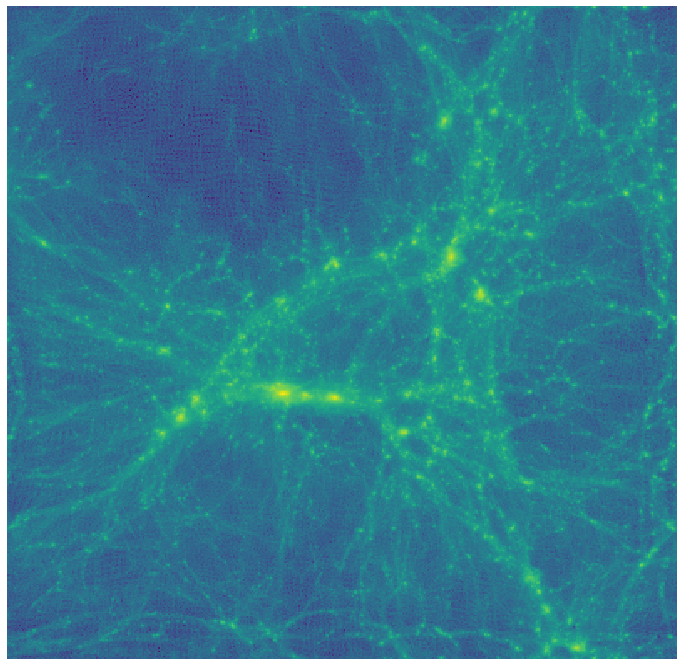

In [12]:
fig = plt.figure(figsize=[12,12])

plt.hist2d(coords_pt1[:,0][z_slice], coords_pt1[:,1][z_slice], norm=LogNorm(), bins=400)
plt.axis('off')
plt.savefig('L3N256_power00_sigma10_z3.svg')
plt.show()

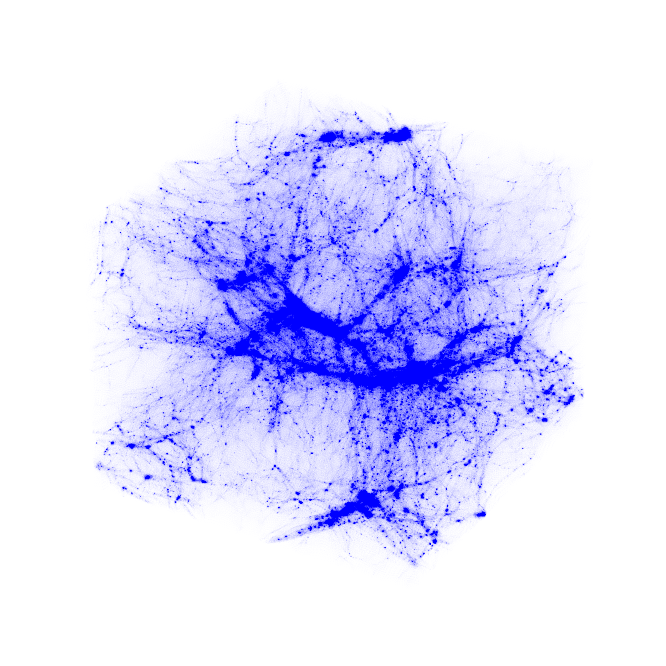

In [11]:
fig = plt.figure(figsize=[12,12])

ax = fig.add_subplot(1,1,1, projection='3d')

#ax.plot3D(coords_pt2[:,0], coords_pt2[:,1], coords_pt2[:,2],'o', color='r',markersize=0.1, alpha=0.1, label='Low Resolution DM')
ax.plot3D(coords_pt1[:,0], coords_pt1[:,1], coords_pt1[:,2],'o', color='b',markersize=0.1, alpha=0.01, label='High Resolution DM')
#ax.scatter(coords_pt0[:,0], coords_pt0[:,1], coords_pt0[:,2], alpha=alphas, cmap='plasma', c=Tvals)
#ax.set_title('Looking at IC')
ax.set_axis_off()
plt.show()